In [94]:
# Initialize Otter
import otter
grader = otter.Notebook("Effective_Stress_notebook.ipynb")

# CEE 175: Geotechnical and Geoenvironmental Engineering

> **Alex Frantzis** <br> Cool Student >:3, UC Berkeley

[![License](https://img.shields.io/badge/license-CC%20BY--NC--ND%204.0-blue)](https://creativecommons.org/licenses/by-nc-nd/4.0/)
***

## Understanding Total Stress, Pore Pressure, and Effective Stress

In soil mechanics, the **total stress**, **pore water pressure**, and **effective stress** are key concepts that describe how forces are distributed within the ground.

### Total Stress (σ)
Total stress is the **entire weight of the soil and any water above a certain depth**.
It represents the pressure from the overlying soil layers acting downward due to gravity.

$$
\sigma = \gamma \, z
$$

where:  
$$
\begin{aligned}
\text{where:} \\
\sigma & = \text{total stress (kPa)} \\
\gamma & = \text{unit weight of the soil (kN/m³)} \\
z & = \text{depth below the surface (m)}
\end{aligned}
$$



---

### Pore Water Pressure (u)
Pore water pressure is the **pressure exerted by water** in the pores of the soil.
It only exists **below the water table**, where the soil is fully saturated.

$$
u = \gamma_w \, (z - z_w)
$$

$$
\begin{aligned}
\text{where:} \\
u & = \text{pore water pressure (kPa)} \\
\gamma_w & = \text{unit weight of water (≈ 9.81 kN/m³)} \\
z_w & = \text{depth to the water table (m)} \\
\text{For } z < z_w, & \; u = 0 \; \text{(no pore pressure above the water table)}
\end{aligned}
$$


---

### Effective Stress (σ′)
Effective stress is the **stress carried by the soil skeleton** — it determines how the soil actually behaves (strength, deformation, and stability).

$$
\sigma' = \sigma - u
$$

$$
\begin{aligned}
\text{where:} \\
\sigma' & = \text{effective stress (kPa)} \\
\sigma & = \text{total stress (kPa)} \\
u & = \text{pore water pressure (kPa)}
\end{aligned}
$$



\begin{aligned}
\textbf{This means:} \\
\text{Above the water table:} & \quad u = 0 \;\Rightarrow\; \sigma' = \sigma \\
\text{Below the water table:} & \quad \text{part of the total stress is supported by water, reducing } \sigma'
\end{aligned}



---

### Key Idea
Think of the soil as a sponge:
- The **total stress** is the weight of everything pressing down.  
- The **pore pressure** is the pressure of water filling the pores.  


In [95]:
# Please run this cell, and do not modify the contents

import hashlib
def get_hash(num):
    """Helper function for assessing correctness"""
    return hashlib.md5(str(num).encode()).hexdigest()

import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

## Question 0: Total Stress Calculation

Write a function named `getStressFunction()` that returns a function which takes depth and calculates the total vertical stress (σ) at that specified depth. This function has the following input argument:
* `thickness`, the thicknesses of the soil layers, arranged from the surface layer (closest to ground) to the deepest layer below ground.
* `density`, the unit weights of the respective soil layers, in kN/m³.

and the following output arguments.
* `stressAtDepth`, a function that takes in a depth (in meters) and returns the total stress (in kPa or kN/m²) acting at that depth due to the weight of the overlying soil.
---
```PYTHON
Example:

    stressAtDepth = getStressFunction([0.5, 1.0, 2.0, 1.5, 3.0], [17.5, 18.0, 19.0, 20.5, 21.0])

>>> stressAtDepth(2)
36.25

>>> stressAtDepth(4)
75.0

>>> stressAtDepth(8)
158.5
```
---
The following is an example of the inputs to the function. Make sure to run it so that the given testing cell has something to test on. For reference on pandas check https://pandas.pydata.org/docs/reference/index.html

In [96]:
# Define soil layers by their thickness and density
layers = {
    "thickness": [0.5, 1.0, 2.0, 1.5, 3.0],   # layer thicknesses in meters
    "density": [17.5, 18.0, 19.0, 20.5, 21.0] # unit weights (kN/m³)
}

df = pd.DataFrame(layers)

# Compute cumulative depth at the bottom of each layer
df["depth"] = df["thickness"].cumsum()

print(df)

   thickness  density  depth
0        0.5     17.5    0.5
1        1.0     18.0    1.5
2        2.0     19.0    3.5
3        1.5     20.5    5.0
4        3.0     21.0    8.0


In [97]:
def getStressFunction(thickness, density):
    def stressAtDepth(z):
        stress = 0 # SOLUTION
        remaining_depth = z # SOLUTION
        
        for i in range(len(thickness)):
            layer_thickness = thickness[i] # SOLUTION
            layer_density = density[i] # SOLUTION

            # If depth is within this layer
            if remaining_depth <= layer_thickness:
                stress += layer_density * remaining_depth # SOLUTION
                break
            else:
                # Full layer contributes its entire weight
                stress += layer_density * layer_thickness # SOLUTION
                remaining_depth -= layer_thickness # SOLUTION
                
        return stress
    
                
    return stressAtDepth

In [98]:
# TEST YOUR FUNCTION HERE

q0 = getStressFunction(df["thickness"], df["density"]) # SOLUTION

# print result
print(f'Stress at depth 2 = {q0(2)} kPa')
print(f'Stress at depth 4 = {q0(4)} kPa')
print(f'Stress at depth 8 = {q0(8)} kPa')

Stress at depth 2 = 36.25 kPa
Stress at depth 4 = 75.0 kPa
Stress at depth 8 = 158.5 kPa


In [99]:
""" # BEGIN TEST CONFIG
points: 0
failure_message: Make sure to test your function!
""" # END TEST CONFIG

# Check students tested the function (type is not ellipsis)
assert get_hash(type(q0)) != '14e736438b115821cbb9b7ac0ba79034'

In [100]:
""" # BEGIN TEST CONFIG
points: 0
failure_message: Your funtion is getting some calculations wrong!
success_message: Function correctly calculates stress for all depth test cases :D
""" # END TEST CONFIG

layers = {    "thickness": [0.5, 1.0, 2.0, 1.5, 3.0], "density": [17.5, 18.0, 19.0, 20.5, 21.0] }
df = pd.DataFrame(layers)
stressAtDepth = getStressFunction(df["thickness"], df["density"])

assert get_hash(int(10 * np.round(stressAtDepth(2), 1))) == 'c3e878e27f52e2a57ace4d9a76fd9acf'
assert get_hash(int(10 * np.round(stressAtDepth(4), 1))) == 'b137fdd1f79d56c7edf3365fea7520f2'
assert get_hash(int(10 * np.round(stressAtDepth(8), 1))) == '228499b55310264a8ea0e27b6e7c6ab6'

In [101]:
""" # BEGIN TEST CONFIG
points: 0
failure_message: Your funtion is getting some calculations wrong!
success_message: Function correctly calculates stress for all depth test cases :D
""" # END TEST CONFIG

layers = {    "thickness": [0.5, 1.0, 2.0, 1.5, 3.0],    "density": [17.5, 18.0, 19.0, 20.5, 21.0]}

# Make DataFrame and cumulative depths
df = pd.DataFrame(layers)

# Build stress function
stressAtDepth = getStressFunction(df["thickness"], df["density"])

# Hash-based validation checks
assert get_hash(int(10 * np.round(stressAtDepth(5), 1)))  == 'ef4e3b775c934dada217712d76f3d51f'
assert get_hash(int(10 * np.round(stressAtDepth(10), 1))) == '228499b55310264a8ea0e27b6e7c6ab6'
assert get_hash(int(10 * np.round(stressAtDepth(20), 1))) == '228499b55310264a8ea0e27b6e7c6ab6'

## Question 1: Effective Stress Calculation

Write a function named `getEffectiveStressFunction()` that returns a function which takes depth and calculates the effective stress (σ') at that specified depth. This function uses the total stress from the soil layers and subtracts the pore water pressure below the water table.
* `thickness`, which are the thicknesses of the soil layers arranged in order from closest to ground to lowest below ground.
* `density`, which are the unit weights (kN/m³) of the respective layers.
* `water_table_depth`, which is the depth (in meters) from the surface to the groundwater table.
* (optional) `gamma_w`, the unit weight of water (kN/m³). Default is 9.81.

and the following output arguments.
* `effectiveStressAtDepth`, a function which takes in a depth (m) and returns the effective stress (kPa or kN/m²) at that depth.
---
    Example:
```PYTHON

effectiveStressAtDepth = getEffectiveStressFunction([0.5, 1.0, 2.0, 1.5, 3.0],[17.5, 18.0, 19.0, 20.5, 21.0],water_table_depth=2.0)

>>> effectiveStressAtDepth(1)
17.5

>>> effectiveStressAtDepth(4)
75

>>> effectiveStressAtDepth(7)
137.5
```
---
The function `getPorePressureFunction` is defined for you below. Read the comments and run it to understand how to use it in your solution

In [102]:
def getPorePressureFunction(water_table_depth, gamma_w=9.81):
    """
    Returns a function that computes pore water pressure at any depth.
    Parameters
    ----------
    Depth (m) to the groundwater table, measured from the surface.
    gamma_w : float, optional
        Unit weight of water (kN/m³). Default = 9.81.

    Returns
    -------
    porePressureAtDepth : function
        Function that takes a depth (m) and returns pore pressure (kPa).
    """
    def porePressureAtDepth(z):
        # If depth is above the water table → no pressure
        if z <= water_table_depth:
            return 0.0
        else:
            # Pressure increases linearly below the water table
            return gamma_w * (z - water_table_depth)

    return porePressureAtDepth

# Water table at 2.0 m depth
porePressure = getPorePressureFunction(water_table_depth=2.0)

print(porePressure(1.0))  # Above water table → 0
print(porePressure(2.0))  # At water table → 0
print(porePressure(5.0))  # Below water table → 9.81 * (5 - 2) = 29.43

0.0
0.0
29.43


In [103]:
def getEffectiveStressFunction(thickness, density, water_table_depth, gamma_w=9.81):
    
    # Get total stress and pore pressure functions
    totalStressAtDepth = getStressFunction(thickness, density) # SOLUTION
    porePressureAtDepth = getPorePressureFunction(water_table_depth, gamma_w) # SOLUTION

    def effectiveStressAtDepth(z):
        total = totalStressAtDepth(z) # SOLUTION
        pore  = porePressureAtDepth(z) # SOLUTION
        return total - pore # SOLUTION

    return effectiveStressAtDepth


In [104]:
# TEST YOUR FUNCTION HERE

q1 = getEffectiveStressFunction([0.5, 1.0, 2.0, 1.5, 3.0],[17.5, 18.0, 19.0, 20.5, 21.0],water_table_depth=2.0) # SOLUTION

# print result
print(f'Stress at depth 1 = {q0(1)} kPa')
print(f'Stress at depth 4 = {q0(4)} kPa')
print(f'Stress at depth 7 = {q0(7)} kPa')

Stress at depth 1 = 17.75 kPa
Stress at depth 4 = 75.0 kPa
Stress at depth 7 = 137.5 kPa


In [105]:
""" # BEGIN TEST CONFIG
points: 0
failure_message: Make sure to test your function!
""" # END TEST CONFIG

# Check students tested the function (type is not ellipsis)
assert get_hash(type(q1)) != '14e736438b115821cbb9b7ac0ba79034'

In [106]:
""" # BEGIN TEST CONFIG
points: 0
failure_message: Your funtion is getting some calculations wrong!
success_message: Function correctly calculates stress for all depth test cases :D
""" # END TEST CONFIG

layers = {
    "thickness": [2,5,7,10],
    "density": [100,200,150,230]
}

df = pd.DataFrame(layers)

# Build effective stress function
water_table_depth = 4  # m
effectiveStress = getEffectiveStressFunction(
    df["thickness"], df["density"], water_table_depth
)

# Hash-based validation checks
assert get_hash(int(10 * np.round(effectiveStress(1), 1)))  == 'a9b7ba70783b617e9998dc4dd82eb3c5'  # Above water table
assert get_hash(int(10 * np.round(effectiveStress(7), 1)))  == 'f2b1b9275b094c26ff1998a09cd9412d'  # Below water table
assert get_hash(int(10 * np.round(effectiveStress(20), 1)))  == '9b3e5c1c0754bc6a379163afabe2af79'  # Deep below water table

In [83]:
""" # BEGIN TEST CONFIG
points: 0
failure_message: Your funtion is getting some calculations wrong!
success_message: Function correctly calculates stress for all depth test cases :D
""" # END TEST CONFIG

layers = {
    "thickness": [0.5, 1.0, 2.0, 1.5, 3.0],
    "density": [17.5, 18.0, 19.0, 20.5, 21.0]
}

df = pd.DataFrame(layers)

# Build effective stress function
water_table_depth = 2.0  # m
effectiveStress = getEffectiveStressFunction(
    df["thickness"], df["density"], water_table_depth
)

# Hash-based validation checks
assert get_hash(int(10 * np.round(effectiveStress(1), 1)))  == '8f85517967795eeef66c225f7883bdcb'  # Above water table
assert get_hash(int(10 * np.round(effectiveStress(4), 1)))  == '5e388103a391daabe3de1d76a6739ccd'  # Below water table
assert get_hash(int(10 * np.round(effectiveStress(7), 1)))  == '170c944978496731ba71f34c25826a34'  # Deep below water table


## Question 2: Plotting Total, Pore, and Effective Stress vs. Depth
In this section, you will **visualize the stress distribution** in the soil by plotting the following quantities as functions of depth:

- **Total Stress** — the total vertical stress due to the weight of the overlying soil.  
- **Pore Water Pressure** — the pressure exerted by water below the water table.  
- **Effective Stress** — the portion of the stress carried by the soil skeleton, defined as:

$$
\sigma' = \sigma - u
$$
---
#### We've implemented all of the graphing for you, or more precisely and AI tool has, and we have checked it. You just have to read our provided diagram and input the parameters at the top.

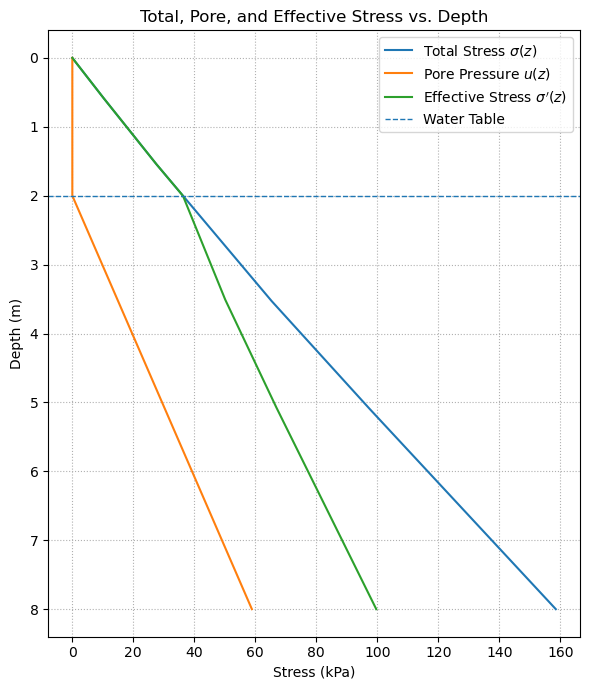

In [110]:
# -----------------------------
# Define soil layers and water table
# -----------------------------
layers = {
    "thickness": [0.5, 1.0, 2.0, 1.5, 3.0],   # m
    "density":   [17.5, 18.0, 19.0, 20.5, 21.0]  # kN/m^3
}
df = pd.DataFrame(layers)
df["depth"] = df["thickness"].cumsum()

water_table_depth = 2.0  # m
gamma_w = 9.81           # kN/m^3

# -----------------------------
# Build callable functions
# -----------------------------
total_stress = getStressFunction(df["thickness"],  df["density"])
pore_pressure = getPorePressureFunction(water_table_depth, gamma_w=gamma_w)
effective_stress = getEffectiveStressFunction(
    df["thickness"], df["density"], water_table_depth, gamma_w=gamma_w
)

# -----------------------------
# Sample depths and compute values
# -----------------------------
z_max = float(df["depth"].iloc[-1])
z = np.linspace(0, z_max, 400)

sigma = np.array([total_stress(zi)     for zi in z])
u     = np.array([pore_pressure(zi)    for zi in z])
sigma_p = np.array([effective_stress(zi) for zi in z])

# -----------------------------
# Plot
# -----------------------------
plt.figure(figsize=(6, 7))

plt.plot(sigma,   z, label=r"Total Stress $\sigma(z)$")
plt.plot(u,       z, label=r"Pore Pressure $u(z)$")
plt.plot(sigma_p, z, label=r"Effective Stress $\sigma'(z)$")

# Water table reference line
plt.axhline(y=water_table_depth, linestyle="--", linewidth=1, label="Water Table")

# Axes formatting
plt.gca().invert_yaxis()  # depth increases downward
plt.xlabel("Stress (kPa)")
plt.ylabel("Depth (m)")
plt.title("Total, Pore, and Effective Stress vs. Depth")
plt.legend()
plt.grid(True, linestyle=":", linewidth=0.8)
plt.tight_layout()
plt.show()


Other Idea

## Question 2: Plotting Total, Pore, and Effective Stress vs. Depth

In this section, you will **visualize the stress distribution** in the soil by plotting the following quantities as functions of depth:

- **Total Stress** — the total vertical stress due to the weight of the overlying soil.  
- **Pore Water Pressure** — the pressure exerted by water below the water table.  
- **Effective Stress** — the portion of the stress carried by the soil skeleton, defined as:

$$
\sigma' = \sigma - u
$$

---

### Instructions

1. Use the previously defined functions:
   - `getStressFunction()`
   - `getPorePressureFunction()`
   - `getEffectiveStressFunction()`

2. Define your soil profile:
   - Layer **thicknesses** and **densities**
   - The **water table depth**

3. Compute:
   - Total stress 
   - Pore water pressure 
   - Effective stress 

   for a range of depths (z) (e.g., from 0 m to the total soil depth in small increments).

4. Plot **Total Stress**, **Pore Pressure**, and **Effective Stress** on the same graph.

---

### Example Plot Layout

- **x-axis:** Stress (kPa) 
- **y-axis:** Depth (m) — increasing **downward**

Use different line styles or colors to distinguish:<br>
— Total Stress  
— Pore Pressure  
— Effective Stress  

Make sure to include:
- A **legend** identifying each curve  
- **Axis labels** with units  
- An **inverted y-axis** so that depth increases downward, matching geotechnical convention.
--- 
### Use the parameters as discerned from the figure below